# Basics of logistic regression

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [3]:
# Cargar los datos desde un archivo CSV
raw_data = pd.read_csv('2.01. Admittance.csv')

In [10]:
# Reemplazar todas las entradas 'No' con 0 y todas las entradas 'Yes' con 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [11]:
# Crear las variables dependientes e independientes
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

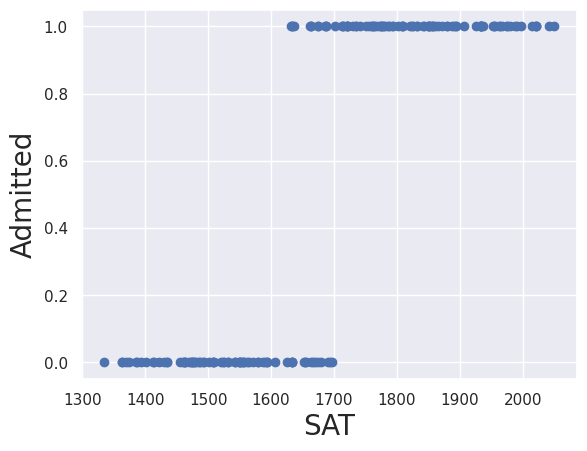

In [6]:
# Crear un gráfico de dispersión de x1 (SAT) y y (Admitted)
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot with a regression line

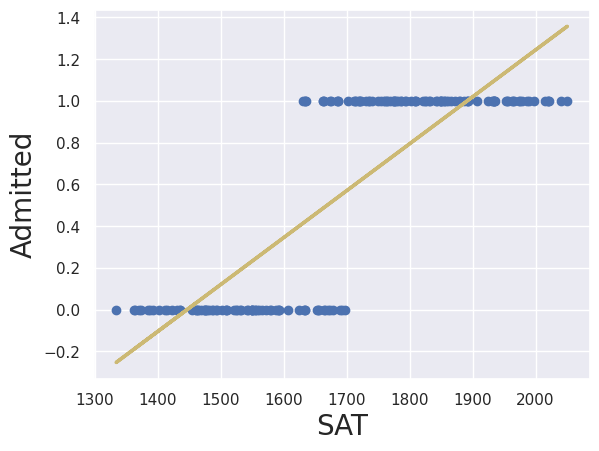

In [7]:
# Crear una regresión lineal para estimar los coeficientes y trazar una línea de regresión
x = sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
results_lin = reg_lin.fit()

# Crear un gráfico de dispersión
plt.scatter(x1, y, color='C0')

# Trazar la línea de regresión
y_hat = x1 * results_lin.params[1] + results_lin.params[0]
plt.plot(x1, y_hat, lw=2.5, color='C8')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


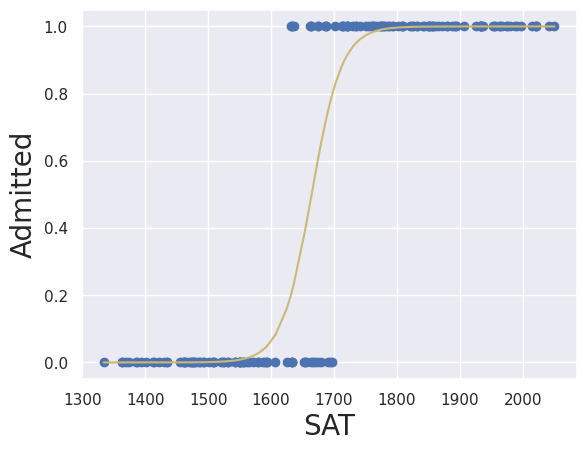

In [13]:
# Crear una regresión logística
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

# Definir una función logística
def f(x, b0, b1):
    return np.array(np.exp(b0 + x * b1) / (1 + np.exp(b0 + x * b1)))

# Ordenar los valores para trazar la curva
f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

# Graficar la regresión logística
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


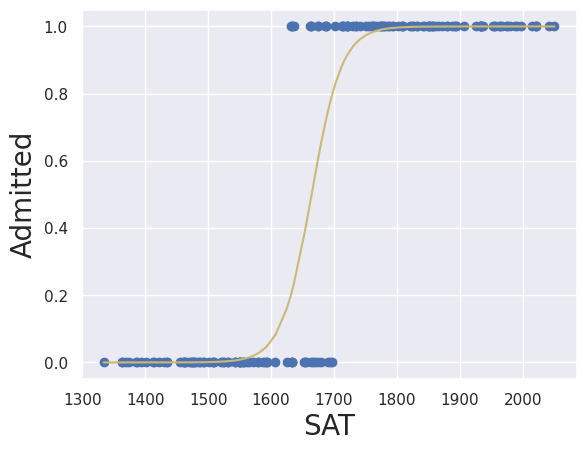

In [15]:
# Creando una regresión logística (discutiremos esto en otro cuaderno)
reg_log = sm.Logit(y, x)
# Creando un objeto de regresión logística utilizando la función Logit de statsmodels

# Ajustando la regresión
results_log = reg_log.fit()
# Ajustando el modelo de regresión logística a los datos para obtener los coeficientes óptimos

# Creando una función logística, dependiendo de la entrada y los coeficientes
def f(x, b0, b1):
    return np.array(np.exp(b0 + x * b1) / (1 + np.exp(b0 + x * b1)))
# Definiendo una función logística que toma una entrada x, así como los coeficientes b0 y b1,
# y calcula la probabilidad de éxito (en este caso, la probabilidad de ser admitido)

# Ordenando y y x, para poder trazar la curva
f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))
# Ordenando los valores calculados de la función logística y los valores de x para poder trazar una curva suave

# Trazando la curva
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
# Dibujando el gráfico de dispersión de los datos originales

plt.plot(x_sorted, f_sorted, color='C8')
# Trazando la curva logística suave utilizando los valores ordenados de x y y de la función logística

plt.show()
# Mostrando el gráfico